#  Problem Statement
####  In 2017, a certain production company, ABC decides to produce movies that will earn the best in terms of revenue, popularity and acclaim. This company approaches agency, XYZ and asks them to come up with characteristics of movies that will help them achieve their purpose. Agency gives the task to Salman. He is given the IMDB database of 1000 movies for the last 10 years (2006-2016). His task is come up with the characteristics of movies that earn:

#### 1.The Highest Revenue
#### 2.Popularity (IMDB Rating)
#### 3.Critical Acclaim (Metacritic Rating)
#### 4.The production company also wants to know whether this is the right time to invest in the movie industry and what strategy they should use to maximize benefits

# Dataset Description

#### The dataset is taken from the IMDB database. It contains data of 1000 most popular movies(by IMDB rating) for the period 2006-2016.
#### IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and  internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.

#### Users registered on this site are invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that  is displayed beside each title.

#### It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic. However, unlike  IMDB, they get ratings from registered well known rating agencies and calculates a weighted average of those ratings.

#### Below is the data dictionary explaining the various columns of the dataset


#### Rank>>>>>	        Movie rank order
####  Title>>>>>	        The title of the film
#### Genre>>>>>	        A comma-separated list of genres used to classify the film
#### Description>>>>>	Brief one-sentence movie summary
#### Director>>>>>>	    The name of the film's director
#### Actors>>>>>>	        A comma-separated list of the main stars of the film
#### Year>>>>>	        The year that the film released as an integer.
#### Runtime (Minutes)>>>>	The duration of the film in minutes.
#### Rating	User rating for the movie 0-10
#### Votes	Number of votes
#### Revenue (Millions)	Movie revenue in millions
#### Metascore	An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.

## importing required libraries

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


## Reading the Dataset

In [69]:

df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')


In [70]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [71]:
# shape of dataset

print("total rows: ",df.shape[0])
print("total columns: ",df.shape[1])

total rows:  1000
total columns:  12


In [72]:
# unique values in all the columns
df.nunique()

Rank                  1000
Title                  999
Genre                  207
Description           1000
Director               644
Actors                 996
Year                    11
Runtime (Minutes)       94
Rating                  55
Votes                  997
Revenue (Millions)     814
Metascore               84
dtype: int64

## A- First, we will do cleaning our data 
##### it include filling missing values etc.


### we have 1000 rows containing 1000 movies details but here unique value of title is only 999. Is there any duplicate movie?
#### let's find out

In [73]:

df[df.Title.duplicated(keep=False)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


#### Based on the result we can see that the movie 'The Host' appear two times. what do you think is the value duplicated?
#### Well answer is 'NO', because the <u>'The Host'<u> movie has released on 2006 and 2013. 

## Checking null values

In [74]:

df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

### Checking the percentage of missing value 

In [75]:
df['Revenue (Millions)'].isnull().mean() #  12% of missing values 

0.128

In [76]:
df['Metascore'].isnull().mean() # 6% of missing value 

0.064

#### 'Revenue' and 'Metascore' is important for our analysis so we cannot drop them
#### 'Revenue' contains around 13% of missing values which is quite high value, so we are going to fill those values 
#### 'Metascore' contains around 6% of missing values, it is not that much high value so we can drop rows that contain missing values

#### Checking the distribution of missing values columns

In [77]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

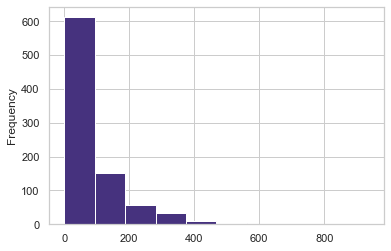

In [78]:
df['Revenue (Millions)'].plot(kind='hist')

### The distribution is right skewed. So we will fill the values with median.

In [79]:
median_rev = df['Revenue (Millions)'].median() 
print(median_rev)

47.985


In [80]:
df['Revenue (Millions)'].fillna(value=median_rev,inplace=True)

In [81]:
df['Revenue (Millions)'].isnull().sum()

0

In [82]:
df.dropna(subset=['Metascore'], inplace=True)


In [83]:
df['Metascore'].isnull().sum()

0

In [84]:
df.shape

(936, 12)

In [85]:
df.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

## B- Now we have cleaned our data, Our next step will be EDA(Exploratory Data Analysis)

## In this section, we are going to Explore the dataset. This involves asking Questions, Exploring the dataset based on the questions. We will use descriptive statistics and also data visualization to help us explore the dataset.
# Questions

##  1.Which director's movie perform overall best in terms of Revenue

In [86]:
# Number of movies directed by each director
df.Director.value_counts().head(5)

Ridley Scott          8
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
David Yates           6
Name: Director, dtype: int64

In [87]:
top5_revenue_movies = df.groupby('Director').agg({'Revenue (Millions)': 'mean', 'Rank':'count'}).sort_values(by='Revenue (Millions)',ascending=False).head(5)
top5_revenue_movies.rename(columns={'Rank': 'No of Movies'},inplace=True)
top5_revenue_movies

,Revenue (Millions),No of Movies
Director,,
James Cameron,760.510,1
Colin Trevorrow,652.180,1
Joss Whedon,541.135,2
Lee Unkrich,414.980,1
Gary Ross,408.000,1


## Visualize the result 

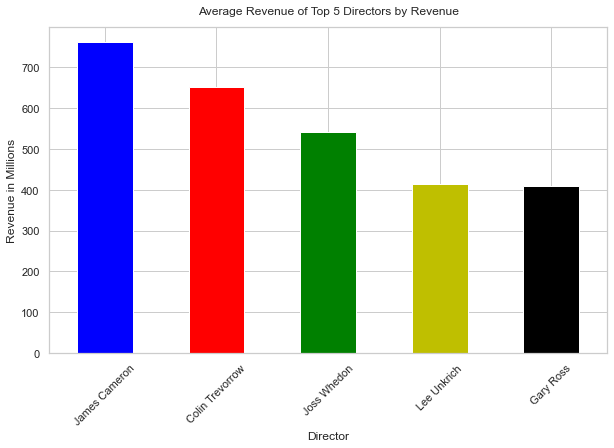

In [88]:
f, ax = plt.subplots(1,figsize=(10,6))
top5_revenue_movies['Revenue (Millions)'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('Revenue in Millions')
ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
ax.set_xticklabels(top5_revenue_movies.index, rotation = 45);


## 2.Movie which receive highest of all time in terms of Revenue

In [89]:

df[df['Revenue (Millions)'] == df['Revenue (Millions)'].max()][['Title','Director','Revenue (Millions)']]

,Title,Director,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936.63


## 3.We want to see Top 5 director names whose movies perform overall  well in terms of Rating

In [90]:
top_5_high_rating = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating',ascending=False).head(5)
top_5_high_rating

,Rating
Director,
Christopher Nolan,8.68
Makoto Shinkai,8.60
Olivier Nakache,8.60
Aamir Khan,8.50
Florian Henckel von Donnersmarck,8.50


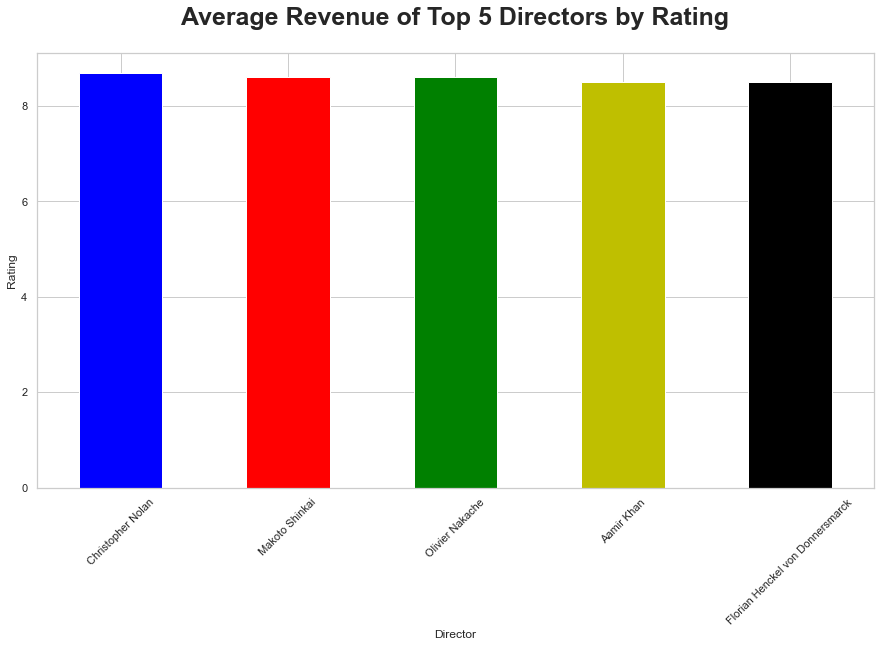

In [91]:
# top 5 Director in terms of rating 
sns.set_theme(context='notebook',palette='viridis' ,style='whitegrid')
f, ax = plt.subplots(1,figsize=(15,8))
top_5_high_rating['Rating'].plot.bar(color=['b', 'r', 'g', 'y', 'k'],ax=ax)
ax.set_ylabel('Rating')
ax.set_title('Average Revenue of Top 5 Directors by Rating', y=1.05,fontsize=25, weight='bold')
ax.set_xticklabels(top_5_high_rating.index, rotation = 45);


In [92]:
# highest Rating
df[df['Rating'] == df['Rating'].max()][['Director','Rating']]


,Director,Rating
54,Christopher Nolan,9.0


In [93]:
# we can do same plot with seaborn 
# sns.set_theme(context='notebook',style='whitegrid')
# f, ax = plt.subplots(1,figsize=(15,8))
# sns.barplot(x=top_5_high_rating.index.to_list(), y=top_5_high_rating['Rating'],ax=ax)


# ax.set_xticklabels(top_5_high_rating.index, rotation = 45)

## 4. Find out the top 5 directors by Metacritic Score

In [94]:

meta_directors = df.groupby('Director').agg({'Metascore': 'mean', 'Rank': 'count'})
top_5_meta_directors = meta_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Metascore', ascending=False)[:5]
top_5_meta_directors

,Metascore,Movies Count
Director,,
Barry Jenkins,99.0,1
Kenneth Lonergan,96.0,1
Todd Haynes,95.0,1
Kathryn Bigelow,94.5,2
Michael Goi,94.0,1


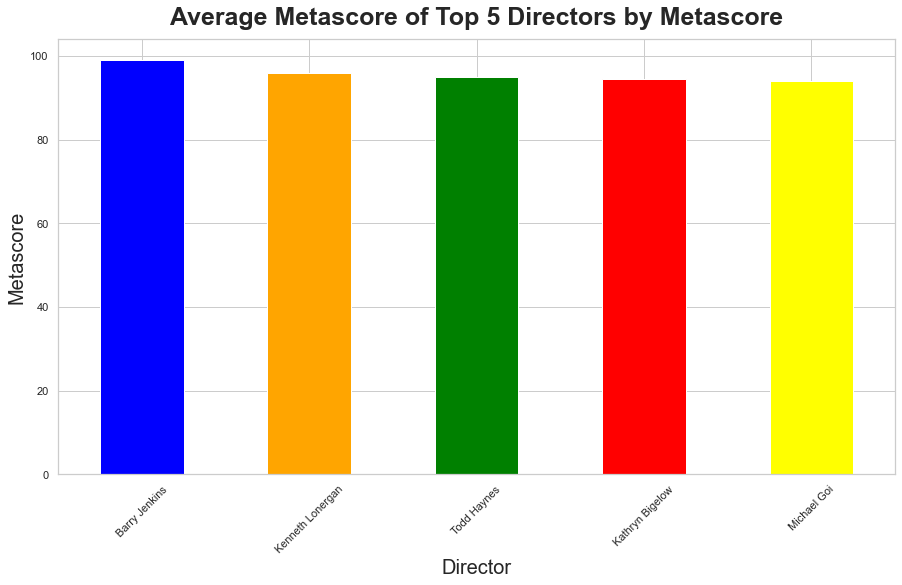

In [95]:
# Plot the result
f,ax = plt.subplots(1,figsize=(15,8))
ax = top_5_meta_directors['Metascore'].plot.bar(color=['blue', 'orange','green','red','yellow']);
ax.set_ylabel('Metascore',fontsize=20)
ax.set_xlabel('Director',fontsize=20)
ax.set_title('Average Metascore of Top 5 Directors by Metascore', y=1.02,fontsize=25, fontweight='bold')
ax.set_xticklabels(top_5_meta_directors.index, rotation = 45);

## 6. How does the runtime of movies affect them?

In [96]:
df['Runtime (Minutes)'].describe()

count    936.000000
mean     113.272436
std       18.550798
min       66.000000
25%      100.000000
50%      111.000000
75%      123.000000
max      187.000000
Name: Runtime (Minutes), dtype: float64

<AxesSubplot:ylabel='Frequency'>

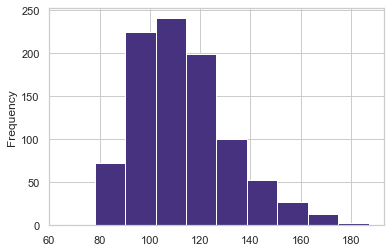

In [97]:
# Plot the distribution of the runtime column
df['Runtime (Minutes)'].plot.hist()

#### I am going to classify the Runtime into different levels based on the output from the describe method
#### Runtime(in minutes)	Level
#### 66-100	Short
#### 100-111	Medium
#### 111-123	Moderately Long
#### 123-187	Lon

In [98]:
runtime_bin_edges = [66,100,111,123,187]
runtime_bin_names = ['Short','Medium','Moderately Long','Long']
df['Runtime_level'] = pd.cut(df['Runtime (Minutes)'], bins = runtime_bin_edges,labels=runtime_bin_names)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Runtime_level
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Moderately Long
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Long
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Moderately Long
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Medium
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Moderately Long


Text(0.5, 1.02, 'Movies Count of each Runtime level')

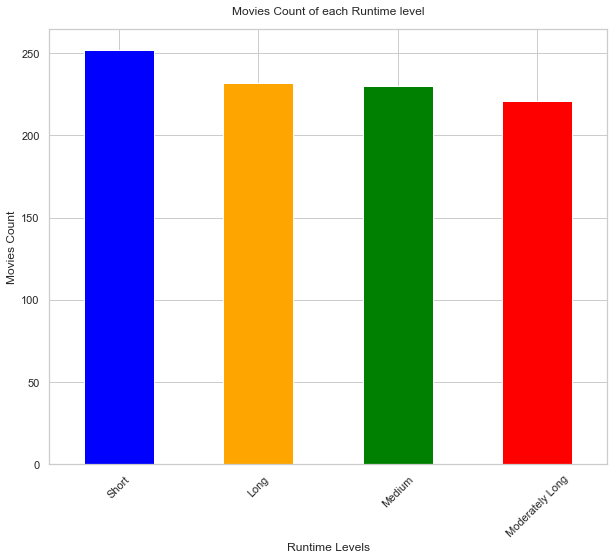

In [99]:
f,ax = plt.subplots(1, figsize=(10,8))
df['Runtime_level'].value_counts().plot.bar(color=['blue', 'orange','green','red','yellow'])
ax.set_ylabel('Movies Count');
ax.set_xlabel('Runtime Levels')
ax.set_xticklabels(df.Runtime_level.value_counts().index, rotation = 45);
ax.set_title('Movies Count of each Runtime level', y=1.02)

## 7. which Runtime Intervel receives highest mean revenue,rating and metascore

In [100]:
df['Runtime_level']

0      Moderately Long
1                 Long
2      Moderately Long
3               Medium
4      Moderately Long
            ...       
995             Medium
996              Short
997              Short
998              Short
999              Short
Name: Runtime_level, Length: 936, dtype: category
Categories (4, object): ['Short' < 'Medium' < 'Moderately Long' < 'Long']

In [101]:
run_stats = df.groupby('Runtime_level')['Revenue (Millions)', 'Rating', 'Metascore'].mean()
run_stats

C:\Users\ansar\AppData\Local\Temp\ipykernel_1576\2196378699.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  run_stats = df.groupby('Runtime_level')['Revenue (Millions)', 'Rating', 'Metascore'].mean()


,Revenue (Millions),Rating,Metascore
Runtime_level,,,
Short,58.164940,6.327381,56.456349
Medium,66.974196,6.579130,55.273913
Moderately Long,66.366244,6.848869,59.276018
Long,132.925733,7.195690,65.021552


[Text(0, 0, 'Short'),
 Text(1, 0, 'Medium'),
 Text(2, 0, 'Moderately Long'),
 Text(3, 0, 'Long')]

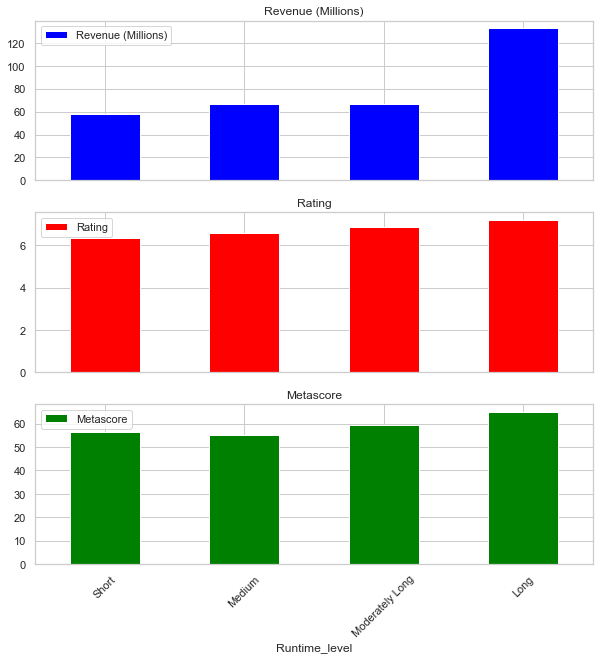

In [102]:
ax1,ax2,ax3 = run_stats.plot.bar(subplots=True,color=['blue','red','green'])
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax3.set_xticklabels(run_stats.index, rotation= 45)

## 1. In general, movies that have Long Runtimes (greater than 123 minutes) earns higher Revenue, more popular and critically acclaimed.
## 2. As the Runtime increases the movies tends to earn higher Revenue, higher popularity and critical acclaim
## 3. It should be noted that, movies with Runtime (greater than 123 minutes) beats other movies in terms of Revenue by a significant margin.

In [103]:
df['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 936, dtype: object

In [104]:
df['Genre_count'] = df.Genre.str.split(',').str.len()

In [105]:
df[['Title','Genre_count']]

,Title,Genre_count
0,Guardians of the Galaxy,3
1,Prometheus,3
2,Split,2
3,Sing,3
4,Suicide Squad,3
...,...,...
995,Secret in Their Eyes,3
996,Hostel: Part II,1
997,Step Up 2: The Streets,3
998,Search Party,2


In [106]:
genre_count_stats = df.groupby('Genre_count')['Revenue (Millions)', 'Rating', 'Metascore'].mean()
genre_count_stats

C:\Users\ansar\AppData\Local\Temp\ipykernel_1576\1161463633.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_count_stats = df.groupby('Genre_count')['Revenue (Millions)', 'Rating', 'Metascore'].mean()


,Revenue (Millions),Rating,Metascore
Genre_count,,,
1,46.641848,6.365217,58.793478
2,55.710591,6.695455,58.677273
3,94.583734,6.794712,59.121795


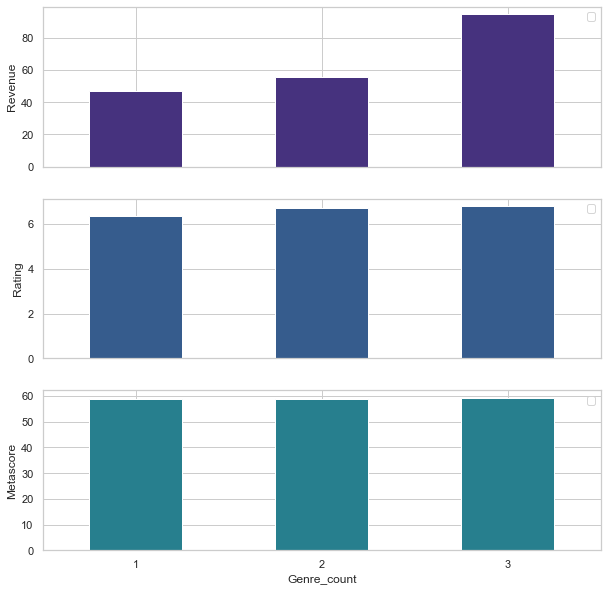

In [107]:
ax1,ax2,ax3 = genre_count_stats.plot.bar(subplots=True)
fig = ax1.get_figure()
fig.set_size_inches(10,10)
ax1.set_ylabel("Revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("Rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("Metascore")
ax3.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats.index, rotation = 0.05);

## The number of genre in the movie increases the revenue significantly.
## However, the number of genre does not impact much to rating and Metascore 

### What are the Genres that that bring higher Revenue, higher rating and higher critical acclaim for a movie?

## 8. Since we know that a Genre count of 3 brings the best out a movie, lets find out which combination of 3 Genres earns more Revenue, rating and critical acclaim

In [108]:
best_genre_combo = df[df['Genre_count'] == 3]
best_genre_combo

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Runtime_level,Genre_count
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130,76.0,Moderately Long,3
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460,65.0,Long,3
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320,59.0,Medium,3
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020,40.0,Moderately Long,3
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130,42.0,Medium,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.200,42.0,Long,3
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.130,37.0,Short,3
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,47.985,45.0,Medium,3
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010,50.0,Short,3


In [109]:
best_genre_combo = best_genre_combo.groupby('Genre')['Revenue (Millions)','Rating','Metascore'].mean()
best_genre_combo

C:\Users\ansar\AppData\Local\Temp\ipykernel_1576\1265076629.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best_genre_combo = best_genre_combo.groupby('Genre')['Revenue (Millions)','Rating','Metascore'].mean()


,Revenue (Millions),Rating,Metascore
Genre,,,
"Action,Adventure,Biography",16.500000,7.000000,62.500000
"Action,Adventure,Comedy",95.733571,6.592857,47.214286
"Action,Adventure,Crime",90.620000,6.433333,48.333333
"Action,Adventure,Drama",81.487647,6.441176,53.411765
"Action,Adventure,Family",96.646250,5.575000,39.500000
...,...,...,...
"Horror,Sci-Fi,Thriller",38.771667,5.433333,41.333333
"Mystery,Romance,Sci-Fi",54.700000,7.500000,74.000000
"Mystery,Romance,Thriller",5.980000,6.300000,24.000000


### Best Genre combo in terms of Revenue

Text(0, 0.5, 'Revenue')

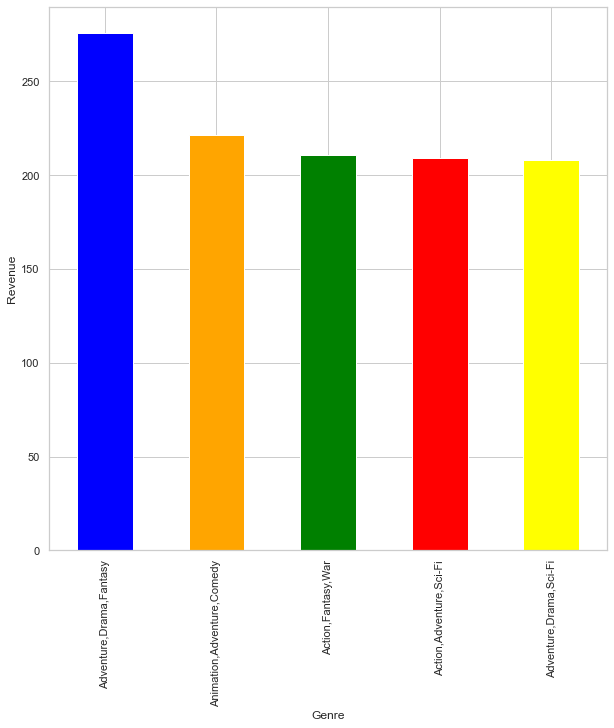

In [110]:
plt.figure(figsize=(10,10))
ax = best_genre_combo['Revenue (Millions)'].sort_values(ascending=False).head(5).plot.bar(color=['blue', 'orange','green','red','yellow'])

ax.set_ylabel('Revenue')

### Best Genre combo in terms of Rating

Text(0.5, 0, 'Rating')

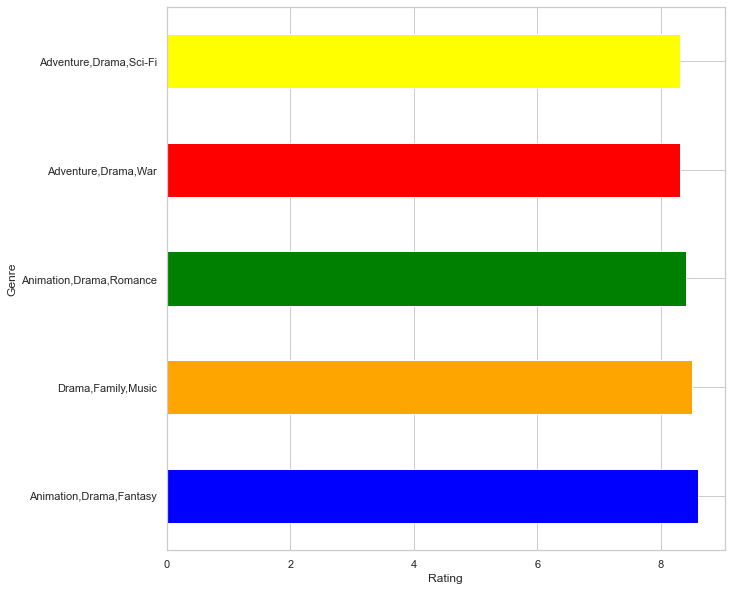

In [111]:
plt.figure(figsize=(10,10))
ax = best_genre_combo['Rating'].sort_values(ascending=False).head(5).plot.barh(color=['blue', 'orange','green','red','yellow'])
ax.set_xlabel('Rating')

### Best Genre combo in terms of Metascore

Text(0, 0.5, 'Metascore')

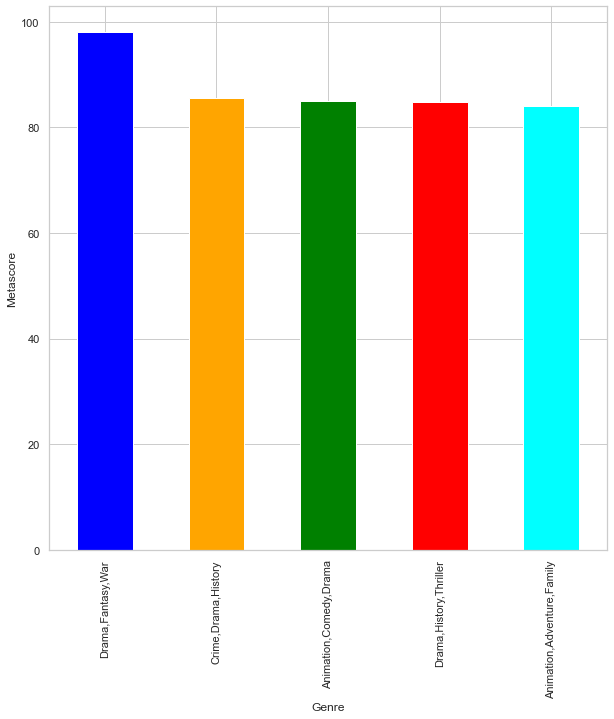

In [112]:
plt.figure(figsize=(10,10))
best_genre_combo['Metascore'].sort_values(ascending=False).head(5).plot.bar(color=['blue', 'orange','green','red','cyan'])
plt.ylabel('Metascore')

## We can see that Adventure,Drama,Fantasy genre produces Highest revenue 

## 9. Is the number of movies increasing over the years ?

In [113]:
movies_year = df.groupby('Year')['Rank'].count()

In [114]:
movies_year

Year
2006     41
2007     46
2008     49
2009     49
2010     59
2011     58
2012     62
2013     86
2014     95
2015    123
2016    268
Name: Rank, dtype: int64

Text(0, 0.5, 'Movies Count')

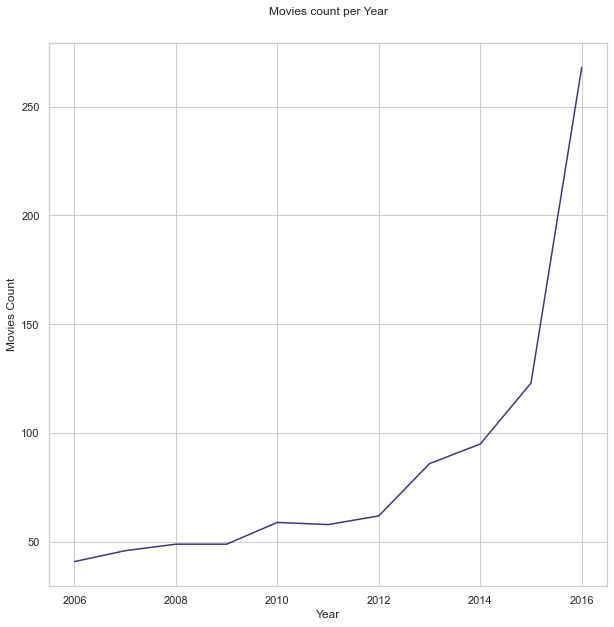

In [115]:
plt.figure(figsize=(10,10))
ax = movies_year.plot()
ax.set_title('Movies count per Year', y=1.04)
ax.set_ylabel('Movies Count')

## We can clearly see that number of movies produced in a year dramatically increasing

 ### 10. Is revenue from movies increase per year?

In [116]:
revenue_year = df.groupby('Year')['Revenue (Millions)'].sum()

In [117]:
revenue_year

Year
2006     3577.480
2007     4191.230
2008     4729.205
2009     5400.330
2010     6085.620
2011     5389.075
2012     6826.390
2013     7495.080
2014     8041.300
2015     9470.880
2016    14361.040
Name: Revenue (Millions), dtype: float64

Text(0, 0.5, 'Revenue')

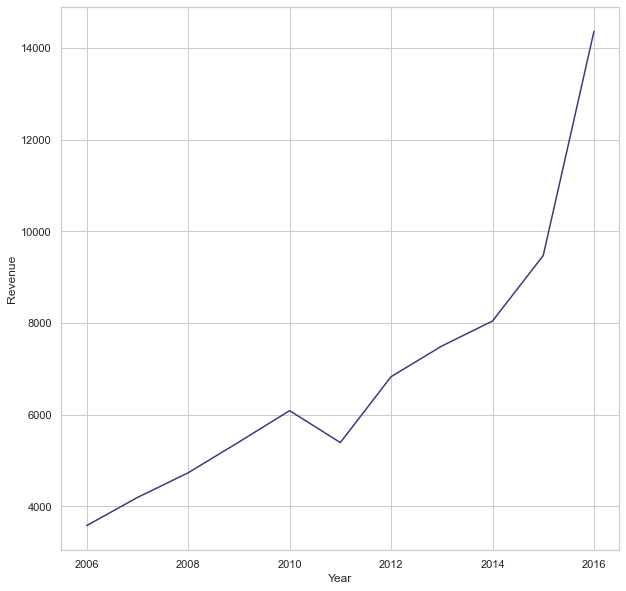

In [118]:
plt.figure(figsize=(10,10))
revenue_year.plot()
plt.ylabel('Revenue')

### Wow! The revenue is incresing Exponentially over the years 

## 11. But Wait, Is the average revenue of the movies increasing over the years ?

In [119]:
average_rev = df.groupby('Year')['Revenue (Millions)'].mean()

Text(0, 0.5, 'Revenue')

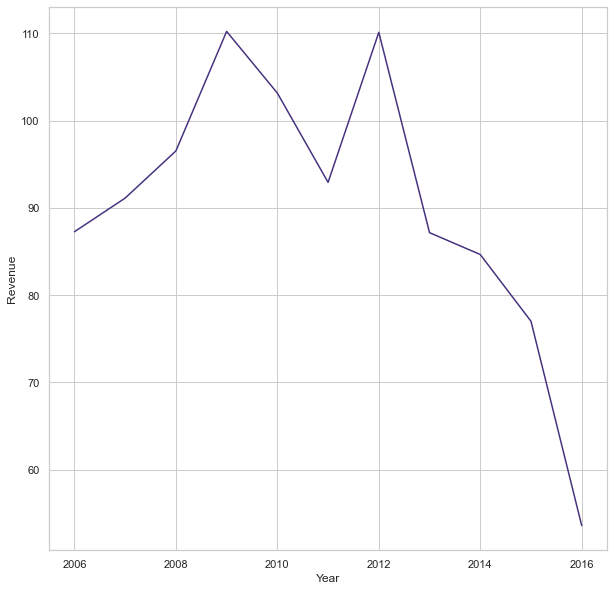

In [120]:
plt.figure(figsize=(10,10))
average_rev.plot()
plt.ylabel('Revenue')

## It is quite intreseting to see that the revenue is increasing over last 10 Years, But Averege revenue is decreasing 
### Well it may be because of the number of films released in a year is increasing 
### Eg: let's say 4 films release in one year so the amount of profit will also distribute among them 
### So probably finding the Director only by the Average Revenue, Average Rating, Average Metascore may not be a good idea. For example James Cameron has only directed a single movie (Avatar in 2009) in the last 10 years. In that year(2009), only 50 movies were released, according to the 'Movies Count per Year' line graph (above). But in 2016, the trend has changed: The number of movies released in 2016 is around 5 times that of movies in 2009.
### So we need to find out the Directors who are more active in terms of directing more movies. Among them we need to find out directors who earn more revenue, rating and metascore. So let's do that below

## 1. Most Active Directors who produced more than 5 movies

In [121]:
most_active_directors = df['Director'].value_counts()[df['Director'].value_counts() >= 5]
most_active_directors

Ridley Scott          8
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
David Yates           6
David Fincher         5
Antoine Fuqua         5
Denis Villeneuve      5
Woody Allen           5
Danny Boyle           5
Christopher Nolan     5
Zack Snyder           5
Peter Berg            5
Justin Lin            5
Martin Scorsese       5
J.J. Abrams           5
Name: Director, dtype: int64

In [122]:
active_director_movies = df[df.Director.isin(most_active_directors.index.tolist())]
active_director_movies.head()
#df['Director'].value_counts()>>EG A DATAFRAME >>DF
# DF[df['Director'].value_counts()>5]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Runtime_level,Genre_count
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Long,3
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Moderately Long,2
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,Long,3
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0,Moderately Long,3
34,35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0,Medium,3


In [123]:
active_director_stats = active_director_movies.groupby('Director')['Revenue (Millions)', 'Rating', 'Metascore'].mean().sort_values('Revenue (Millions)', ascending=False)
active_director_stats[:5]

C:\Users\ansar\AppData\Local\Temp\ipykernel_1576\3824961326.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  active_director_stats = active_director_movies.groupby('Director')['Revenue (Millions)', 'Rating', 'Metascore'].mean().sort_values('Revenue (Millions)', ascending=False)


,Revenue (Millions),Rating,Metascore
Director,,,
J.J. Abrams,336.690000,7.580000,74.600000
Christopher Nolan,303.018000,8.680000,74.800000
David Yates,271.751667,7.433333,68.500000
Michael Bay,236.886667,6.483333,43.833333
Zack Snyder,195.148000,7.040000,48.000000


## 2. Most Active director's who's movie perfoems well in terms of revenue 

Text(0.5, 0, 'Revenue')

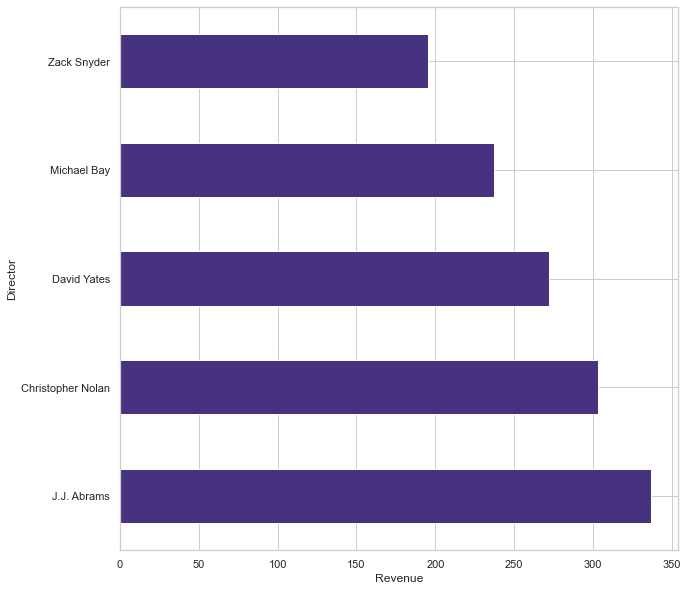

In [124]:
plt.figure(figsize=(10,10))
active_director_stats[:5]['Revenue (Millions)'].plot.barh()
plt.xlabel('Revenue')

Text(0.5, 0, 'Revenue')

<Figure size 720x720 with 0 Axes>

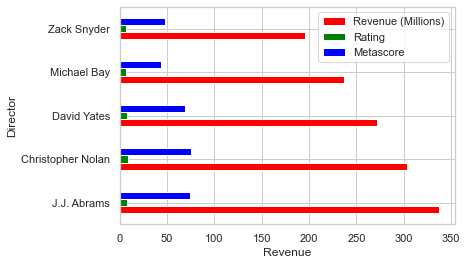

In [125]:
plt.figure(figsize=(10,10))
active_director_stats[:5].plot.barh(color=['red','green','blue'])
plt.xlabel('Revenue')

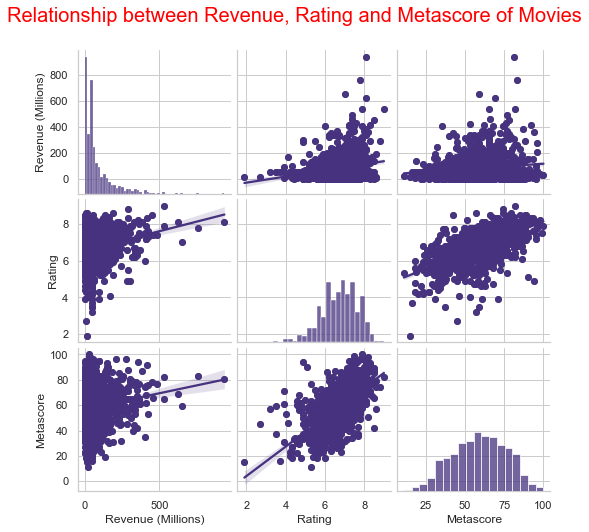

In [126]:
a=sns.pairplot(df, palette="muted",height=2.5,vars=['Revenue (Millions)', 'Rating', 'Metascore'], kind='reg');

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Revenue, Rating and Metascore of Movies',fontsize=20,color='r',alpha=1);

## This section draws the conclusion from the exploration done on the dataset.

# Director

#### The director who has earned the highest average revenue is James Cameron.However he has directed only 1 movie in the 10 year period.
#### Christopher Nolan's movies are the most popular among viewers as the average rating for his movies is the highest in the 10 year period.
#### Looking at the Movie Industry Trend, most active directors are more favored.
#### Among the most active directors, J J Abrams's movies earn more in terms of Average Revenue
#### Christopher Nolan is the most popular active director in terms of Average Rating among people

# Runtime 

#### Movies with Long runtimes (> 123 minutes) earn more in terms of Revenue, Rating and Metascore.
#### Revenue is dramatically high for movies with Long runtimes

# Genre

#### As the Genre count increases in a movie, its Revenue, Rating and Metascore are on the rise.
#### However, revenue is significantly high for movies with Genre count of 3.
#### Adventure as Genre is a common factor for movies that brings in more Revenue, with the Genre combination of "Adventure, Drama, Fantasy" earning the highest Revenue
#### The most popular Genre is Drama and the Genre combination of "Animation, Drama, Fantasy" earns the highest Rating.
#### Again Drama is popular among Critics as well, with the Genre combination of "Drama, Fantasy, War" earning the highest Metascore.


# Industry Growth

#### Industry is growing with respect to number of movies released and the total revenue gained year on year.
#### However, the average revenue of movies year on year is showing a negative trend. This is probably because of increased competition and more movies released in the industry.
#### The popularity of movies is also showing a negative trend year on year. This is probably because of more movies released with Genre combinations which are unpopular among viewers.


# Rating for movies in General
#### In general, movies with higher rating and metascore tend to earn more revenue as well.

# Actionable Insights


##### Produce multiple movies with best features - The movie industry is growing very fast. More movies are released year on year and the competition is very high and the revenue is distributed among many movies. It would not be a good idea to wait for that ONE BIG MOVIE like Avatar (by James Cameron) that brings highest Revenue, Rating and Metascore. So, produce more movies using the best features (explained below) for reaping the maximum benefits.

#### Produce movies that have Long runtimes - Runtime greater than 2 hrs.

#### Produce movies with 3 Genre combination - Include a mix of Drama, Animation, Adventure, Sci-Fi, Fantasy. The movies should relate to audience with real life incidents, should move them to the edge of the seats and should enhance their imagination.

#### Produce movies that will satisfy both People and Critics - These movies will earn higher Revenue more often than not.

# Wow! these amazing insights we get from the dataset.
# Again, You can ask many more questions and extract more insights

# Thank You